In [30]:
import numpy as np
np.random.seed(2023 - 5 - 21)
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Let's say that we have 2 bags -> A and B
# Each have a number of vouchers whose monetary values range from negative to positive.

In [15]:
A = np.random.randint(-50, 50, size = 1000)
B = np.random.randint(-50, 50, size = 1000)

In [16]:
np.unique(A, return_counts = True)

(array([-50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38,
        -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25,
        -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12,
        -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,
          2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
         41,  42,  43,  44,  45,  46,  47,  48,  49]),
 array([11,  7, 13,  8,  9,  8, 10,  3,  9, 11,  9,  9,  9, 13,  9,  6, 10,
        10, 14, 10, 16,  8,  5, 10, 13,  6, 17,  9,  7, 11,  9,  8, 12, 11,
        10,  8, 11,  9,  8,  6, 13, 12,  3, 16, 10,  7,  7,  8, 12, 11,  8,
        10, 12, 10, 12, 11,  6, 13,  9, 11,  4,  9,  3, 11,  6,  9, 11,  9,
        11,  7, 12, 13, 10,  9,  8,  9,  7, 10, 18,  8, 14,  7, 12, 15, 11,
        17, 19, 15, 14,  8,  7,  9, 11,  9, 15, 13,  9

In [57]:
print(f"Total value of all vouchers in bag A is: {A.sum()} and bag B is: {B.sum()}")

Total value of all vouchers in bag A is: 1102 and bag B is: -830


In [58]:
assert all(np.unique(A) == np.unique(B)), "Shit went south"

In [26]:
ftable = pd.DataFrame({"A": np.unique(A, return_counts = True)[1], "B": np.unique(B, return_counts = True)[1]}, index = np.unique(A))

In [31]:
ftable

,A,B
-50,11,15
-49,7,9
-48,13,14
-47,8,12
-46,9,15
...,...,...
45,13,8
46,9,10
47,7,12
48,13,11


![Bags](./bags.jpeg)

In [52]:
# Now we have the data from two bags, let's remove the labels -> Now we're left with two bags without labels.
# Let's randomly pick one voucher from the bag at hand and given the value of the voucher can we say which bag it was taken from?

In [ ]:
# If the voucher is a $ 

![Bags](./bags.jpeg)

In [59]:
# Say that we got a $ 40 voucher, frequency of $ 40 vouchers in 
# Bag A is 9
# Bag B is 11

# Since bag B has a higher frequency of $ 40 vouchers, the bag we selected the voucher from is likely to be bag B by a smaller margin.
# Since the difference is not that significant.

In [70]:
A.size

1000

ValueError: The number of FixedLocator locations (113), usually from a call to set_ticks, does not match the number of labels (101).

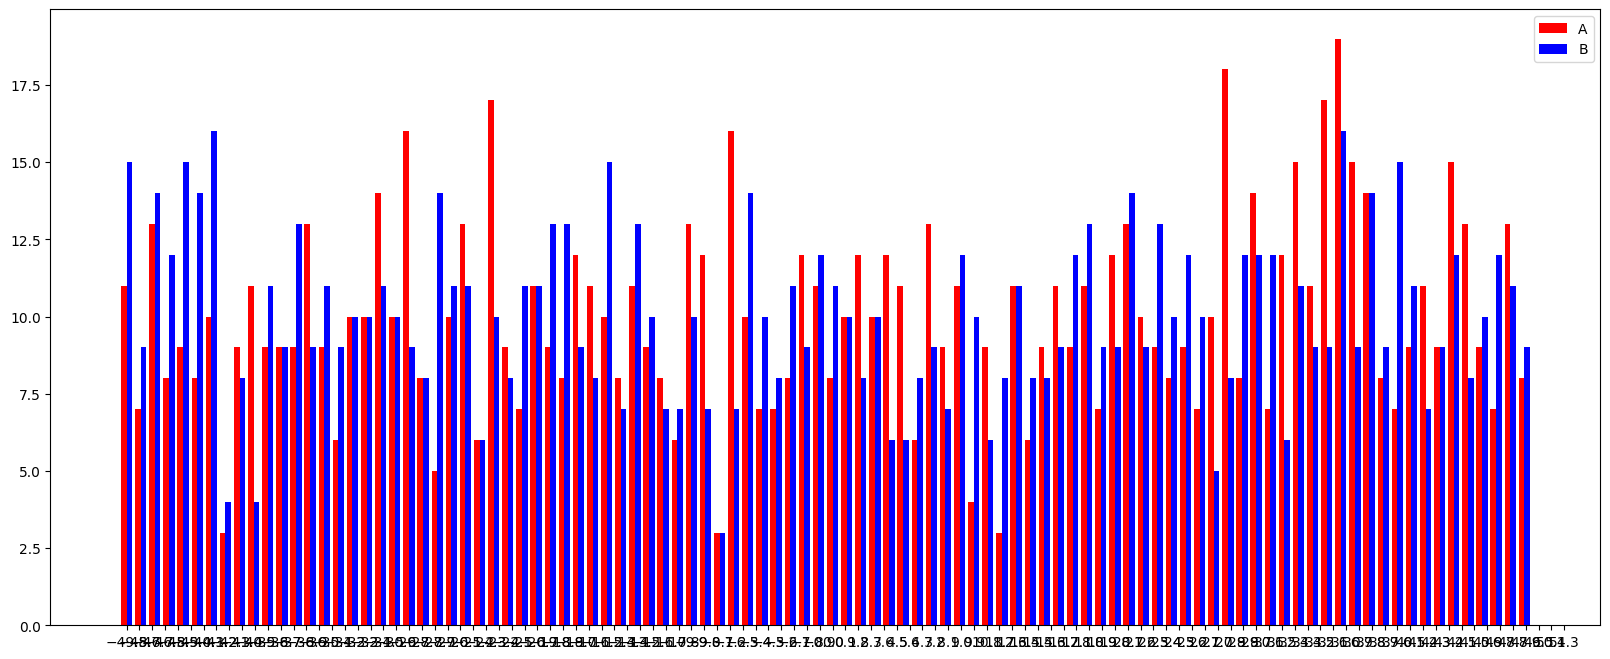

In [94]:
# Another way to view this problem is to view the distributions of the two bags as two different models.

plt.hist([A, B], bins = 100, rwidth = 0.8, color = ["red", "blue"], label = ["A", "B"])
plt.legend()
plt.xticks(ticks = np.arange(-49.5, 51.5, .9), labels = np.arange(-50, 51, 1), rotation = 90)
plt.show()